In [1]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import SwapGate, CXGate
from qiskit.quantum_info import random_unitary
from weylchamber import c1c2c3, g1g2g3, WeylChamber, canonical_gate
import matplotlib.pyplot as plt
from monodromy.haar import gates_to_haar
from qiskit.extensions import UnitaryGate
from qiskit.quantum_info import Operator
from monodromy.haar import expected_cost, gates_to_coverage
from monodromy.render import _plot_coverage_set
from qiskit.circuit.library import iSwapGate, XXPlusYYGate, CXGate
import numpy as np
from monodromy.render import _plot_coverage_set
from monodromy.coverage import gates_to_coverage
from monodromy.render import gates_to_coverage_plot
from monodromy.haar import expected_cost, coverage_to_approx_haar
from monodromy.coverage import coverage_lookup_cost

# %matplotlib widget

In [2]:
# define fidelity model as function of (time) cost
class ErrorModel:
    """Use affine error model [1], which relates linearly fidelity to execution time.
    Ref:
    [1] https://quantum-journal.org/papers/q-2022-04-27-696/
    0.992331 comes from [1], their experimentally determined m(1.0) + b,
    NOTE their unit 1.0 is normlized to pi/4.
    """

    def __init__(self, unit_fidelity=0.992331):
        """Unit fidelity is the fidelity of operation with unit cost 1.0

        NOTE: simple convention is that CX, iSWAP have unit cost 1.0, then
        sqrt(CX) and sqrt(iSWAP) have unit cost 0.5, etc.
        """
        assert 0 <= unit_fidelity and unit_fidelity <= 1
        self.unit_fidelity = unit_fidelity

    def fidelity(self, cost):
        return (self.unit_fidelity - 1) * cost + 1

    def infidelity(self, cost):
        return 1 - self.fidelity(cost)


affine_error_model = ErrorModel()

In [3]:
# U = XXPlusYYGate(np.pi/2, np.pi/6)
# U = XXPlusYYGate(np.pi/2, np.pi/4)
# U2 = U.power(1/2)
# U = CXGate()
U = iSwapGate().power(1 / 2)
# target = random_unitary(4)
target = UnitaryGate(canonical_gate(0.5, 0.25, 0.25))

In [4]:
# U = iSwapGate().power(1 / 5)
# # coverage_1 = gates_to_coverage_plot(U, U2, U3, costs=[0.5, 0.25, 0.75])
# # coverage_1 = gates_to_coverage_plot(U, U2, U3, costs=[0.5, 0.25, 0.125])
# coverage_1 = gates_to_coverage_plot(U, U4, costs=[1 / 5, 1 / 8])
# print(expected_cost(coverage_1))  # print(gates_to_haar(U))
# coverage_1 = gates_to_coverage_plot(U2, U4, costs=[1 / 6, 1 / 8])
# print(expected_cost(coverage_1))  # print(gates_to_haar(U))
# coverage_1 = gates_to_coverage_plot(U3, U4, costs=[1 / 7, 1 / 8])
# print(expected_cost(coverage_1))  # print(gates_to_haar(U))

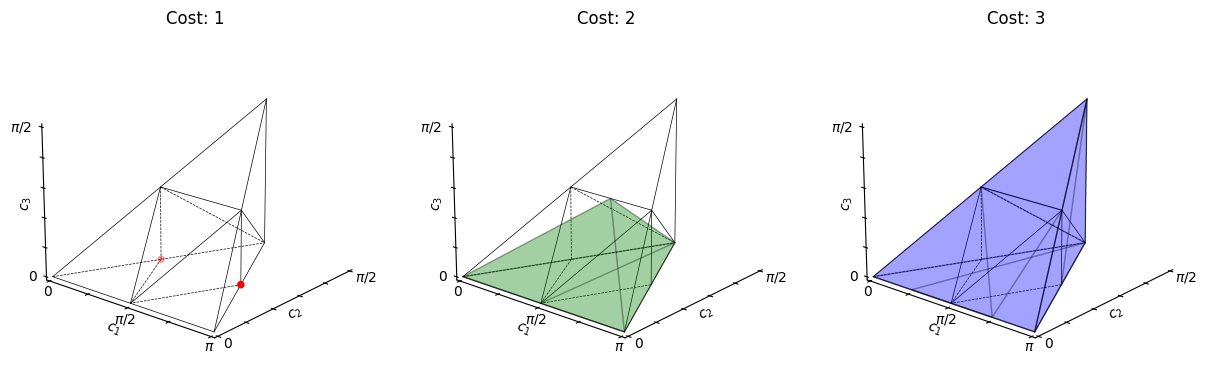

2.2098826363156774


In [5]:
coverage_1 = gates_to_coverage_plot(U, target, costs=[1])
# target_build_ansatz(coverage_set=coverage_1, target=target).draw("mpl")
print(expected_cost(coverage_1))

In [6]:
target = UnitaryGate(canonical_gate(0.5, 0.25, 0.26))
print(coverage_lookup_cost(coverage_1, target))
print(coverage_lookup_cost(coverage_1, target, affine_error_model))

3
2


In [7]:
coverage_to_approx_haar(coverage_1, affine_error_model)

100%|██████████| 100/100 [05:24<00:00,  3.24s/it]


2.18

Note that this functionality exists in monodromy, but I could not get the coordinate normalizations to work

```python
monodromy.coordinates.mirror_monodromy_polytope
```


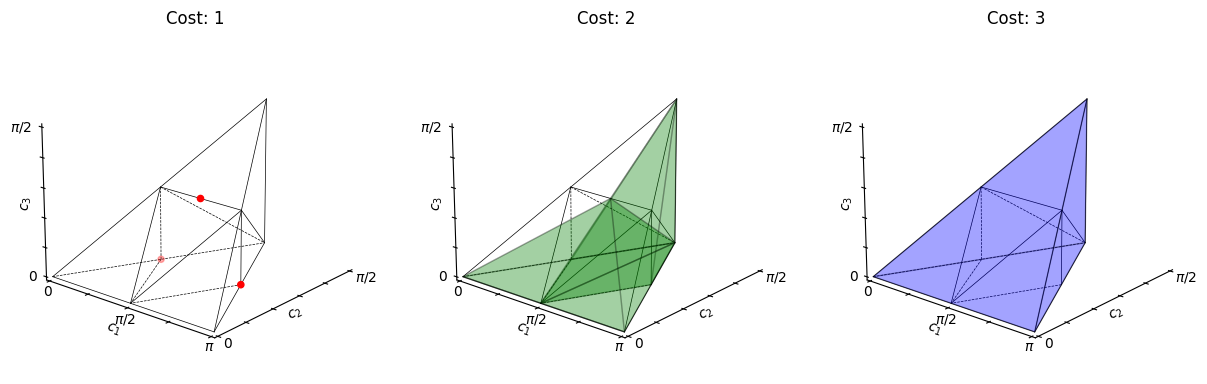

2.0563850449989367


In [8]:
# coverage_2 = gates_to_coverage_plot(U, U2, U3, SwapGate(), costs=[0.5, 0.25, 0.75, 0])
coverage_2 = gates_to_coverage_plot(U, SwapGate(), costs=[1, 0])
print(expected_cost(coverage_2))

In [1]:
# target_build_ansatz(coverage_set=coverage_2, target=target).draw("mpl")
target = UnitaryGate(canonical_gate(0.47, 0.47, 0.45))
print(coverage_lookup_cost(coverage_2, target))
print(coverage_lookup_cost(coverage_2, target, affine_error_model))

In [10]:
coverage_to_approx_haar(coverage_2, affine_error_model)

100%|██████████| 100/100 [08:12<00:00,  4.92s/it]


2.08

In [11]:
# coverage = gates_to_coverage(
#     # iSwapGate(),
#     iSwapGate().power(3 / 4),
#     iSwapGate().power(1 / 2),
#     iSwapGate().power(1 / 4),
#     costs=[.75, .5, 0.25],
# )
# _plot_coverage_set(coverage)
# print(expected_cost(coverage))